In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA


dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')



In [ ]:
dfTrain.Age = dfTrain.Age.fillna(dfTrain.Age.median())
dfTest.Age = dfTest.Age.fillna(dfTrain.Age.median())

dfTrain.Embarked = dfTrain.Embarked.fillna(value='S')
dfTest.Embarked = dfTrain.Embarked.fillna(value= 'S')


In [ ]:
print(dfTrain.isna().sum())
dfTrain.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dfTrain.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dfTrain.drop(["Name","PassengerId","Ticket"], axis=1, inplace=True)
dfTest.drop(["Name","PassengerId","Ticket"], axis=1, inplace=True)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(dfTrain, z='Age', x='Survived', y='Fare',
              color='Sex')
fig.show()

#nice! 

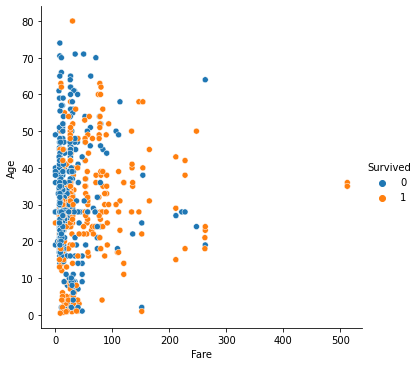

In [ ]:
sns.relplot(data=dfTrain, y='Age', hue='Survived', x='Fare',kind='scatter')

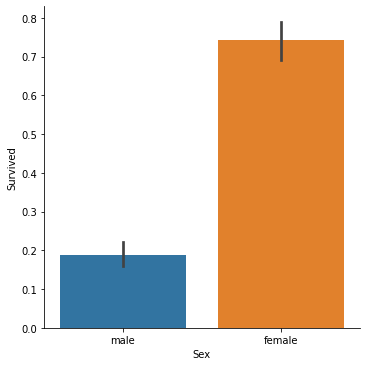

In [ ]:
sns.catplot(data=dfTrain, y='Survived', x='Sex', kind='bar')

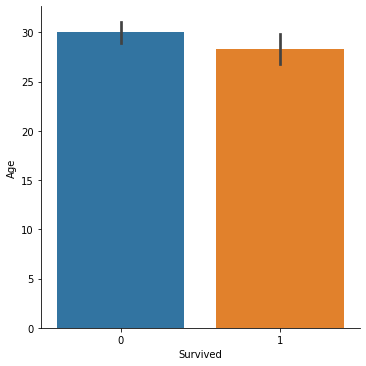

In [ ]:
sns.catplot(data=dfTrain, y='Age', x='Survived', kind='bar')

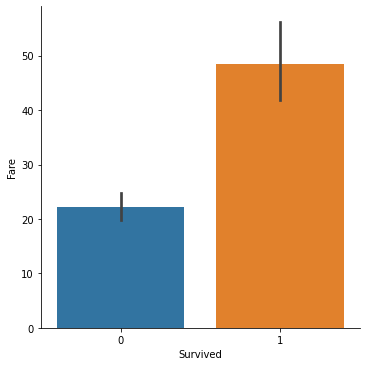

In [ ]:
sns.catplot(data=dfTrain, y='Fare', x='Survived', kind='bar');

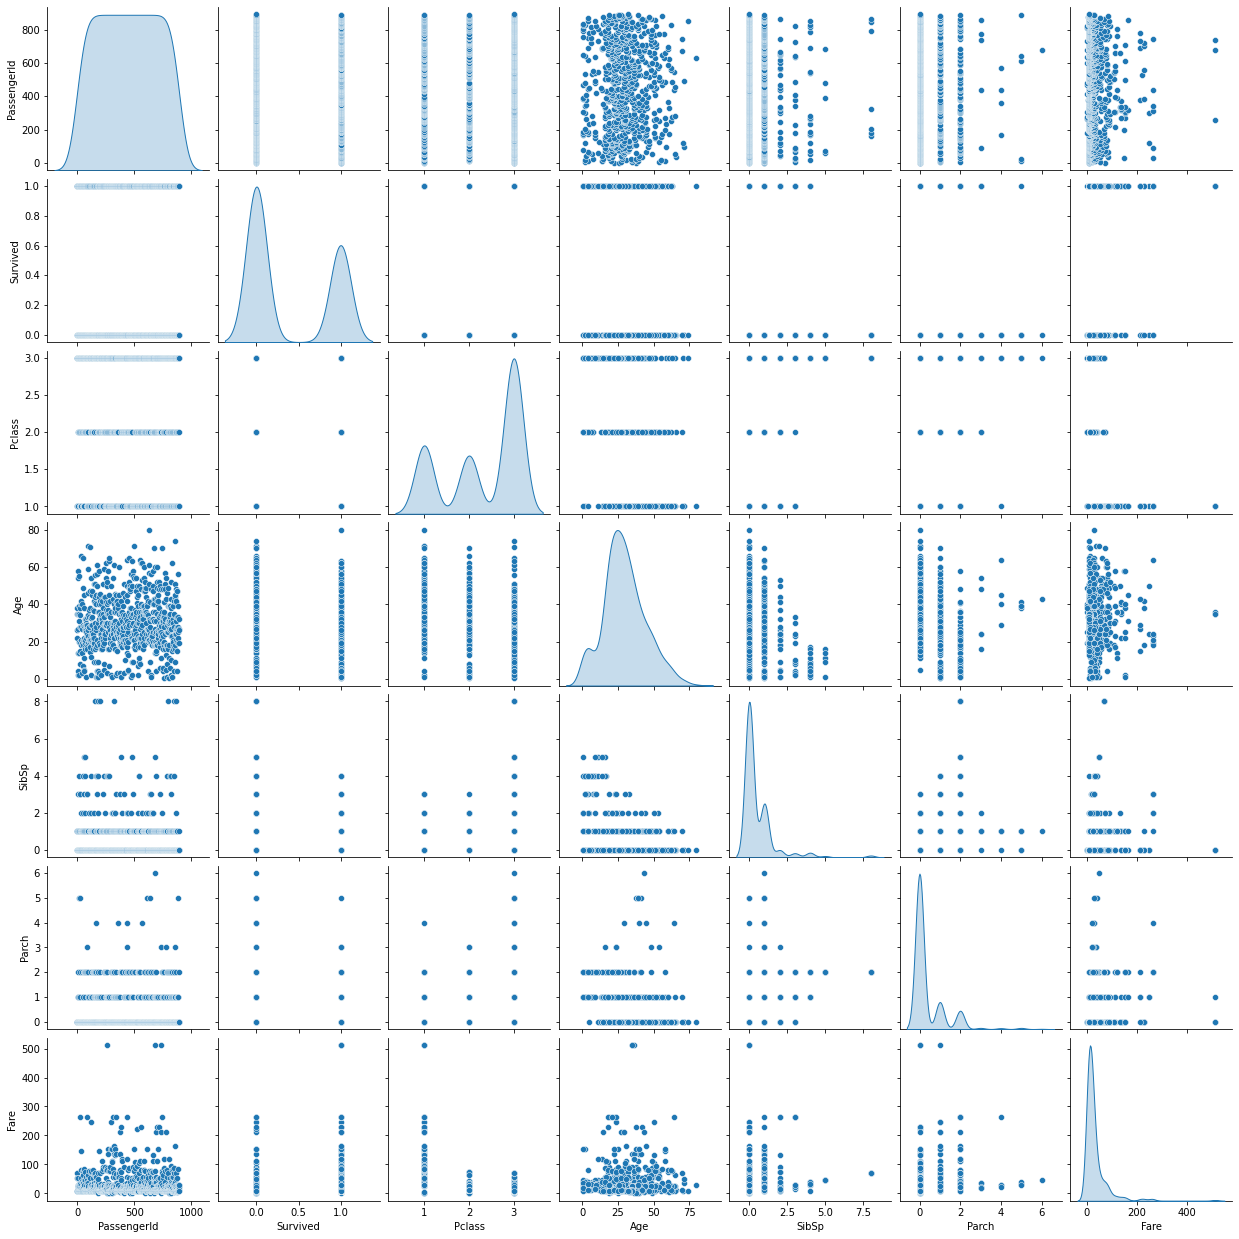

In [ ]:
sns.pairplot(dfTrain, diag_kind='kde');

In [ ]:
dfTrain.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

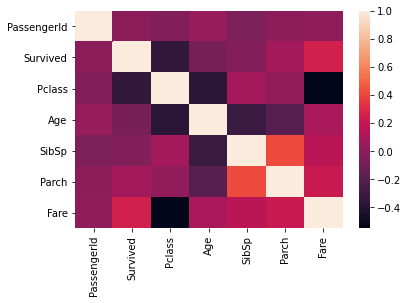

In [ ]:
sns.heatmap(dfTrain.corr())

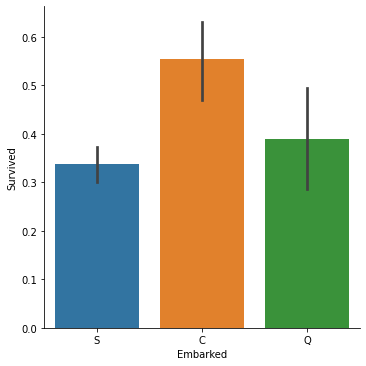

In [ ]:
sns.catplot(data=dfTrain, x='Embarked', y='Survived', kind='bar');

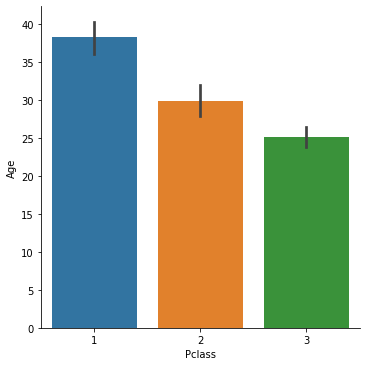

In [ ]:
sns.catplot(data=dfTrain, x='Pclass', y='Age', kind='bar');

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
scaler = StandardScaler()
onehot = OneHotEncoder()
labelit = LabelEncoder()

dfTrain.Age = scaler.fit_transform(dfTrain[['Age']])
dfTrain.Fare = scaler.fit_transform(dfTrain[['Fare']])
dfTrain.Embarked = labelit.fit_transform(dfTrain['Embarked'])
dfTrain.Sex = labelit.fit_transform(dfTrain['Sex'])

dfTest.Age = scaler.fit_transform(dfTest[['Age']])
dfTest.Fare = scaler.fit_transform(dfTest[['Fare']])
dfTest.Embarked = labelit.fit_transform(dfTest['Embarked'])
dfTest.Sex = labelit.fit_transform(dfTest['Sex'])






In [ ]:
dfTrain.head(40)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,NaN,2
1,1,1,0,0.663861,1,0,0.786845,C85,0
2,1,3,0,-0.258337,0,0,-0.488854,NaN,2
3,1,1,0,0.433312,1,0,0.420730,C123,2
4,0,3,1,0.433312,0,0,-0.486337,NaN,2
5,0,3,1,-0.104637,0,0,-0.478116,NaN,1
6,0,1,1,1.893459,0,0,0.395814,E46,2
7,0,3,1,-2.102733,3,1,-0.224083,NaN,2
8,1,3,0,-0.181487,0,2,-0.424256,NaN,2
9,1,2,0,-1.180535,1,0,-0.042956,NaN,0
